# Locally Linear Embedding (LLE) algorithm for Graph data

In [212]:
# Locally Linear Embedding (LLE) algorithm 
# https://redwood.berkeley.edu/wp-content/uploads/2018/06/chen2018sparse.pdf
# [48] Sam T Roweis and Lawrence K Saul. Nonlinear dimensionality reduction by locally linearembedding.science, 290(5500):2323–2326, 2000.

In [217]:

using JSON
using Glob
using Dates
using Plots
using ProgressMeter
using DataFrames
using CSV
using StatsBase


include("../src/manifoldLearning.jl")
include("../src/encoding.jl")


encodeData2SparseMat (generic function with 1 method)

### Create data 2D

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


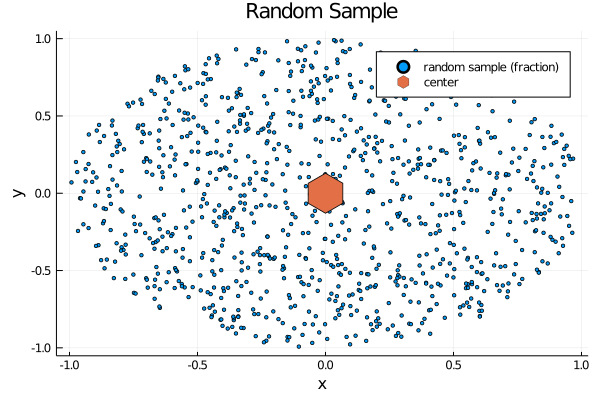

In [214]:

struct Data2D
    
    x::Float64
    y::Float64
    
end

dist2D(pt1::Data2D, pt2::Data2D) = (pt1.x-pt2.x)^2 + (pt1.y-pt2.y)^2


# create data
nData = 1000
data = [Data2D(0., 0.)]
while length(data) < nData
    x, y = 2*rand()-1, 2*rand()-1
    if x^2 + y^2 < 1.
        push!(data, Data2D(x, y))
    end
end


adjacencyMatrix = zeros(nData, nData)

for i=1:nData
    for j=1:nData
        adjacencyMatrix[i,j] = dist2D(data[i], data[j]) < 0.2
    end
end


adjacencyMatrix = zeros(nData, nData)

I, J, K = [], [], []
@showprogress for i=1:nData
    for j=1:nData
        if dist2D(data[i], data[j]) < 0.2
            
            adjacencyMatrix[i,j] = 1
            push!(I, i); push!(J, j); push!(K, 1)
            
        end
    end
end

sparseAdjMatrix = sparse(I, J, K, nData, nData);



scatter(map(d -> d.x, data[1:1000]),
        map(d -> d.y, data[1:1000]),
        label="random sample (fraction)", marker=(:circle,2,1.))


scatter!([data[1].x], [data[1].y],
         label="center", marker=(:hexagon, 20, 1.), 
         xlabel = "x", ylabel="y", title="Random Sample")



### Data to be encoded

In [216]:

data2Encode = Data2D[]
nData2Encode = 1000

while length(data2Encode) < nData2Encode
    
    x, y = 2*rand()-1, 2*rand()-1
    
    if x^2 + y^2 < 1.
        push!(data2Encode, Data2D(x, y))
    end
    
end


In [218]:

encoderModel = Dict(:N => 10000, :W => 10)

localembedder = LocallyLinearEmbedding(encoderModel[:N],encoderModel[:W],adjacencyMatrix);


### Encode data (Adjacency Matrix)

In [220]:
idx = 1
nNeighb = 2
encodeData2Idces(idx, localembedder, nNeighb)

20-element Array{Int64,1}:
 5798
 6017
  776
 4921
 3458
 8906
 8978
 6058
 6776
 4269
 6456
 6675
 1434
 5579
 4116
 9564
 9636
 6716
 7434
 4927

### encode data into sparse matrix

In [200]:
encoder=idx->encodeData2Idces(idx, localembedder, 10)
@time hdMat = encodeData2SparseMat(collect(1:nData2Encode), encoder, encoderModel);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


  1.208006 seconds (21.65 M allocations: 361.641 MiB, 9.89% gc time)


### Encode data (Sparse Matrix)

In [223]:

encoderModel = Dict(:N => 10000, :W => 10)

localembedder = LocallyLinearEmbedding(encoderModel[:N],encoderModel[:W],sparseAdjMatrix);


In [224]:
encoder=idx->encodeData2Idces(idx, localembedder, 10)

#345 (generic function with 1 method)

In [225]:
@time hdMAT = encodeData2SparseMat(collect(1:nData2Encode), encoder, encoderModel);

  0.142809 seconds (311.83 k allocations: 27.469 MiB)
